# LOGISTIC REGRESSIONS
Logistic regression is a statistical method for binary classification that predicts the probability of an event occurring by fitting data to a logistic curve. It is commonly used when the dependent variable is binary—like predicting whether a tumor is benign (class B) or malignant (class M) in medical datasets.

**Using Logistic Regression on This Dataset**:
**Prepare the Data**: Identify features and the binary target ('diagnosis').

**Standardize the Data**: Normalize features to ensure consistent scaling.

**Train and Evaluate the Model**: Split the data into training and test sets, train the logistic regression model on the training set, and evaluate its performance using metrics like accuracy and ROC curve.

**Prediction**: Use the model to predict malignancy probabilities for new samples.

Logistic regression is particularly useful due to its simplicity and effectiveness in providing probabilities for classification outcomes, making it a good choice for initial analysis in medical diagnostics.

In [1]:
#Import all the libraries needed in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import Lasso

# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
#Downloading the data, the training and the test set
data = pd.read_csv("Data.csv")
data_test = pd.read_csv("test_set.csv") 
data_train = pd.read_csv("train_set.csv")

## Creationn of a validation set

In [8]:
# Suddivisione del training set in un nuovo training set e un validation set
train_data, val_data = train_test_split(data_train, test_size=0.2, random_state=42)

# Salvataggio dei nuovi set di dati
train_data.to_csv("train_set_1.csv", index=False)
val_data.to_csv("validation_set.csv", index=False)

# Verifica
print(f"Training set size: {train_data.shape}")
print(f"Validation set size: {val_data.shape}")

Training set size: (399, 9)
Validation set size: (100, 9)


In [9]:
data_train_1 = pd.read_csv("train_set_1.csv")
data_val = pd.read_csv("validation_set.csv")

In [10]:
# Separazione delle caratteristiche e della variabile target
X_train = train_data.drop(columns='diagnosis')
y_train = train_data['diagnosis']
X_train_1 = train_data.drop(columns='diagnosis')
y_train_1 = train_data['diagnosis']
X_val = val_data.drop(columns='diagnosis')
y_val = val_data['diagnosis']
X_test = data_test.drop(columns='diagnosis')
y_test = data_test['diagnosis']

# Standardizzazione delle caratteristiche
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_1 = scaler.fit_transform(X_train_1)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Aggiunta di una colonna di costante per il modello di statsmodels
X_train_const = sm.add_constant(X_train_scaled)
X_train_const_1 = sm.add_constant(X_train_scaled_1)
X_val_const = sm.add_constant(X_val_scaled)
X_test_const = sm.add_constant(X_test_scaled)

## First, we will explore a logistic regression model using the training set and the validation set. 

In [11]:
# Creazione e addestramento del modello di regressione logistica
logit_model = sm.Logit(y_train_1, X_train_const_1)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.171275
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  399
Model:                          Logit   Df Residuals:                      390
Method:                           MLE   Df Model:                            8
Date:                Fri, 24 May 2024   Pseudo R-squ.:                  0.7526
Time:                        10:16:18   Log-Likelihood:                -68.339
converged:                       True   LL-Null:                       -276.20
Covariance Type:            nonrobust   LLR p-value:                 8.071e-85
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5519      0.357      4.344      0.000       0.852       2.252
x1             1.2408      0.

In [12]:
# Predizioni sui set di training, validation e test
train_pred = result.predict(X_train_const_1)
val_pred = result.predict(X_val_const)
test_pred = result.predict(X_test_const)

In [13]:
# Conversione delle predizioni in etichette binarie
train_pred_label = (train_pred > 0.5).astype(int)
val_pred_label = (val_pred > 0.5).astype(int)
test_pred_label = (test_pred > 0.5).astype(int)

In [14]:
# Calcolo delle metriche principali
def print_metrics(y_true, y_pred, dataset_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    print(f"{dataset_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")

In [15]:
print_metrics(y_train, train_pred_label, "Training")
print_metrics(y_val, val_pred_label, "Validation")
print_metrics(y_test, test_pred_label, "Test")

Training Metrics:
Accuracy: 0.9248
Precision: 0.9305
Recall: 0.9110
F1 Score: 0.9206
ROC AUC: 0.9242
Confusion Matrix:
[[195  13]
 [ 17 174]]

Validation Metrics:
Accuracy: 0.9800
Precision: 0.9818
Recall: 0.9818
F1 Score: 0.9818
ROC AUC: 0.9798
Confusion Matrix:
[[44  1]
 [ 1 54]]

Test Metrics:
Accuracy: 0.9256
Precision: 0.9060
Recall: 0.9550
F1 Score: 0.9298
ROC AUC: 0.9246
Confusion Matrix:
[[ 93  11]
 [  5 106]]



## LASSO and RIDGE regularization

In [16]:
# Tracciamento del grafico dell'accuratezza al variare del parametro di regolarizzazione C
train_accuracies = []
val_accuracies = []
test_accuracies = []
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

In [17]:
for C in C_values:
    lr_model = LogisticRegression(C=C, max_iter=10000)
    lr_model.fit(X_train_scaled, y_train)
    
    train_acc = accuracy_score(y_train, lr_model.predict(X_train_scaled))
    val_acc = accuracy_score(y_val, lr_model.predict(X_val_scaled))
    test_acc = accuracy_score(y_test, lr_model.predict(X_test_scaled))
    
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    test_accuracies.append(test_acc)

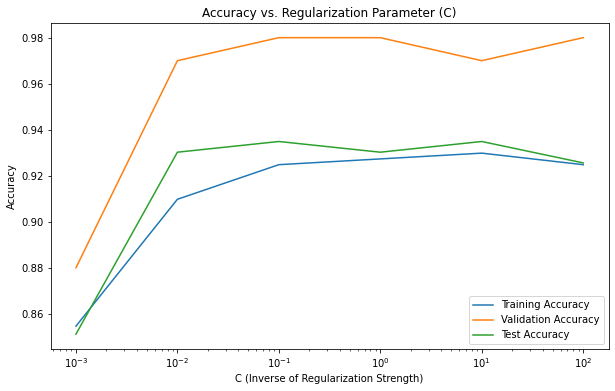

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Training Accuracy')
plt.plot(C_values, val_accuracies, label='Validation Accuracy')
plt.plot(C_values, test_accuracies, label='Test Accuracy')
plt.xscale('log')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Regularization Parameter (C)')
plt.legend()
plt.show()

- **Loading the datasets**: The training and validation data are loaded from the files `data_train_1.csv` and `data_val.csv`.
- **Separating features and target variable**: The features and the target variable (column `target`) are separated.
- **Standardizing the features**: The features are standardized to have a mean of 0 and a standard deviation of 1.
- **Creating and training the logistic regression model**: A logistic regression model is created and trained using `statsmodels`.
- **Predictions and calculating metrics**: Predictions are made on the training, validation, and test sets, and the main metrics such as accuracy, precision, recall, F1 score, and ROC AUC are calculated.
- **Plotting the accuracy graph**: A graph is plotted to show how accuracy varies with the regularization parameter `C`.

### Observing the Training Accuracy

It's interesting to note that the accuracy on the training set initially increases with \( C \), reaches a peak, and then seems to stabilize or even slightly decrease. There are a few possible explanations for this behavior:

### Possible Explanations

1. **Noise in the Training Data**:
   - When the regularization parameter \( C \) is very high, the regularization is very weak, allowing the model to fit even the fine details and noise present in the training data. This can lead to a situation where the model starts to capture spurious patterns that do not represent the underlying data well. This excessive fitting to noise can cause a deterioration in training performance as the model fails to clearly distinguish between signal and noise.

2. **Extreme Overfitting**:
   - In an extreme overfitting regime, the model might start making very specific predictions that are highly accurate for certain subsets of the training data but less accurate overall. This can lead to fluctuations in training performance and, in rare cases, a slight decrease.


3. **Stochasticity in Training**:
   - Sometimes, fluctuations can be due to the stochastic nature of the optimization algorithm (e.g., gradient descent). Even with a high \( C \) value, if the optimization process is noisy, you might see slight fluctuations in performance.

4. **Complex Interactions Between Parameters**:
   - In complex models, interactions between different hyperparameters (such as the learning rate and \( C \)) can affect performance. For example, a very high learning rate combined with a very high \( C \) value might cause instability in training.

### Can the Training Curve Decline?

It is unusual, but not impossible, for the training accuracy curve to decline in the presence of a very high \( C \) value. Generally, we would expect training accuracy to increase or stabilize as \( C \) increases (less regularization), but due to the reasons mentioned above, there could be cases where the curve slightly declines.

### Final Considerations

To confirm and better understand this behavior, you might want to conduct further experiments, such as:

- **Try Different Learning Rates**: Explore if the learning rate affects this behavior.
- **Cross-Validation**: Use cross-validation to ensure performance is consistent across different subsets of the data.
- **Analyze Noise in Training Data**: Examine if there are patterns or outliers in the training data that could affect performance.

Overall, the behavior observed in the graph is intriguing and may require deeper analysis to be fully understood.


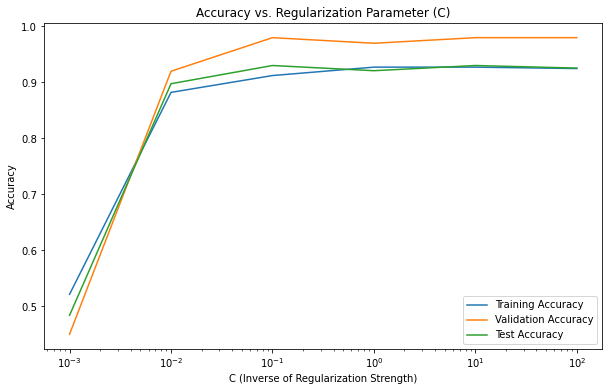

In [22]:
# Tracciamento del grafico dell'accuratezza al variare del parametro di regolarizzazione C con L1
train_accuracies = []
val_accuracies = []
test_accuracies = []
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

for C in C_values:
    lr_model = LogisticRegression(C=C, penalty='l1', solver='liblinear', max_iter=10000)
    lr_model.fit(X_train_scaled, y_train)
    
    train_acc = accuracy_score(y_train, lr_model.predict(X_train_scaled))
    val_acc = accuracy_score(y_val, lr_model.predict(X_val_scaled))
    test_acc = accuracy_score(y_test, lr_model.predict(X_test_scaled))
    
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    test_accuracies.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Training Accuracy')
plt.plot(C_values, val_accuracies, label='Validation Accuracy')
plt.plot(C_values, test_accuracies, label='Test Accuracy')
plt.xscale('log')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Regularization Parameter (C)')
plt.legend()
plt.show()

### Graph Interpretation

The graph shows how accuracy varies with the regularization parameter \( C \):

- **Training Accuracy (Blue Line)**: Increases rapidly with \( C \), then stabilizes.
- **Validation Accuracy (Orange Line)**: Increases similarly, peaks, and then plateaus slightly above training accuracy.
- **Test Accuracy (Green Line)**: Follows the validation trend, slightly lower.

**Conclusion**:
- **Low \( C \)**: Underfitting, low accuracy.
- **Intermediate \( C \)**: Best accuracy, optimal balance between bias and variance.
- **High \( C \)**: Potential overfitting, stable or slightly decreasing validation and test accuracy.